# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [71]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [72]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.loc[pyber_data_df["city"]=="Lake Jonathanshire"]

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
76,Lake Jonathanshire,4/7/2019 20:51,31.25,4.441250e+12,5,Urban
154,Lake Jonathanshire,3/9/2019 23:45,19.89,2.389500e+12,5,Urban
185,Lake Jonathanshire,4/7/2019 18:09,24.28,7.796810e+12,5,Urban
196,Lake Jonathanshire,1/2/2019 14:14,13.89,4.242550e+11,5,Urban
277,Lake Jonathanshire,4/6/2019 11:30,16.84,6.164450e+12,5,Urban
329,Lake Jonathanshire,3/21/2019 0:18,37.95,8.353660e+12,5,Urban
497,Lake Jonathanshire,1/28/2019 0:07,5.67,9.756570e+12,5,Urban
693,Lake Jonathanshire,1/24/2019 12:24,34.65,3.319120e+12,5,Urban
712,Lake Jonathanshire,3/24/2019 16:27,14.94,1.670910e+12,5,Urban


## Deliverable 1: Get a Summary DataFrame 

In [73]:
#  1. Get the total rides for each city type
rides_citytype=pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_citytype.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [74]:
# 2. Get the total drivers for each city type
drivers_citytype=city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_citytype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [75]:
#  3. Get the total amount of fares for each city type
fare_citytype=pyber_data_df.groupby(["type"]).sum()["fare"]
fare_citytype.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [76]:
#  4. Get the average fare per ride for each city type. 
averagefare_citytype=pyber_data_df.groupby(["type"]).mean()["fare"]
averagefare_citytype

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [77]:
# 5. Get the average fare per driver for each city type. 
# need to convert the (drivers_citytype (which is in intiger)) into a float if not you will receive this error 
#https://stackoverflow.com/questions/37222989/why-numpy-ndarray-is-object-is-not-callable-in-my-simple-for-python-loop/37223062
urban_fareperdriver=fare_citytype["Urban"]/float(drivers_citytype["Urban"])
suburban_fareperdriver=fare_citytype["Suburban"]/float(drivers_citytype["Suburban"])
rural_fareperdriver=fare_citytype["Rural"]/float(drivers_citytype["Rural"])
#you can turn values into a panda series per https://www.geeksforgeeks.org/creating-a-pandas-series/ 
average_fare_values=[urban_fareperdriver,suburban_fareperdriver,rural_fareperdriver]
average_fare_index=["Urban","Suburban","Rural"]
average_fare_sr=pd.Series(average_fare_values,index=average_fare_index)


In [78]:
#  6. Create a PyBer summary DataFrame. 
# https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/ 
pyber_summary_df=pd.DataFrame({"Total Rides":rides_citytype, "Total Drivers":drivers_citytype,"Total Fare":fare_citytype,"Average Fare per Ride":averagefare_citytype,"Average Fare per Driver":average_fare_sr})
pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [79]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [80]:
#  8. Format the columns.

pyber_summary_df["Total Fare"]=pyber_summary_df["Total Fare"].map("${:2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [81]:
# 1. Read the merged DataFrame
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [82]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_pertype_date=pyber_data_df.groupby(["type","date"]).sum()["fare"]
fare_pertype_date

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [83]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_pertype_date_reset=fare_pertype_date.reset_index()
#convert date object to datetime https://pbpython.com/pandas_dtypes.html
#fare_pertype_date_reset["date"]=fare_pertype_date_reset["date"].astype("datetime64")
fare_pertype_date_reset.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [84]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_pertype_date_pivot=fare_pertype_date_reset.pivot(index="date", columns="type", values="fare")
fare_pertype_date_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [85]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
## could have used fare_pertype_date_reset["date"]=fare_pertype_date_reset["date"].astype("datetime64") in line 5 of cell 214
# df.index = pd.to_datetime(df.index)
fare_pertype_date_pivot.index = pd.to_datetime(fare_pertype_date_pivot.index)

In [86]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
start_date= "2019-01-01"
stop_date= "2019-04-29"
fare_jantomarch=fare_pertype_date_pivot.loc[start_date:stop_date]
fare_jantomarch.loc['2019-04-29'].sum()

type
Rural        67.60
Suburban    167.92
Urban       342.63
dtype: float64

In [87]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_jantomarch.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [88]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fare_jantomarch.resample('W').sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


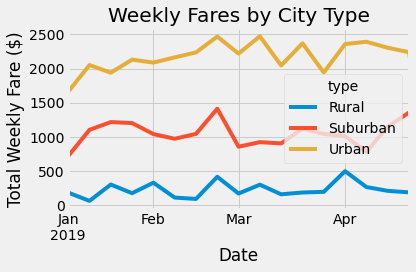

In [91]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares=weekly_fares_df.plot()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#"2019-04-25" creates a week for 5/05/2019, you could drop the week by setting the date to "2019-04-28"
weekly_fares.set_xlim(start_date,"2019-04-28")
weekly_fares.set_title("Weekly Fares by City Type")
weekly_fares.set_ylabel("Total Weekly Fare ($)")
weekly_fares.set_xlabel("Date")
# plot matplotlib getting cut off using this https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
weekly_fares.figure.tight_layout()
# Save the figure.
# subplot has no attribut to savefig, have to state attribute as figure first https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror
weekly_fares.figure.savefig("Analysis/weekly_Fares.png")